In [4]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.CPU)

<DeviceId.CPU: 99>

In [1]:
from deoldify.visualize import get_image_colorizer,torch

torch.backends.cudnn.benchmark=True
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

NumExpr defaulting to 8 threads.


NOTE:  Set artistic to False if you're having trouble getting a good render.  Chances are it will work with the Stable model. 

In [2]:
colorizer = get_image_colorizer(artistic=True)

# Instructions

### source_url
Type in a url to a direct link of an image.  Usually that means they'll end in .png, .jpg, etc.  NOTE: If you want to use your own image, you can set source_url to None and just upload the image to /test_images/ in Jupyter.  Just make sure that the source_path parameter matches the file you uploaded.

### source_path
Name this whatever sensible image path (plus extension of jpg/png/ext) you want!  Sensible means the path exists and the file exists if source_url=None.

### render_factor
The default value of 35 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the image is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality images in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality images, but the colors may get slightly washed out. 

### result_path
Ditto- don't change.

### How to Download a Copy
Simply shift+right click on the displayed image and click "Save Image As..."!


## Pro Tips
1. You can evaluate how well the image is rendered at each render_factor by using the code at the bottom (that cell under "See how well render_factor values perform on a frame here"). 
2. Keep in mind again that you can go up top and set artistic to False for the colorizer to use the 'Stable' model instead.  This will often tend to do better on portraits, and natural landscapes.  


## Troubleshooting
If you get a 'CUDA out of memory' error, you probably have the render_factor too high.  The max is 45 on 11GB video cards.

## Colorize!!

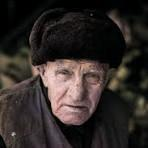

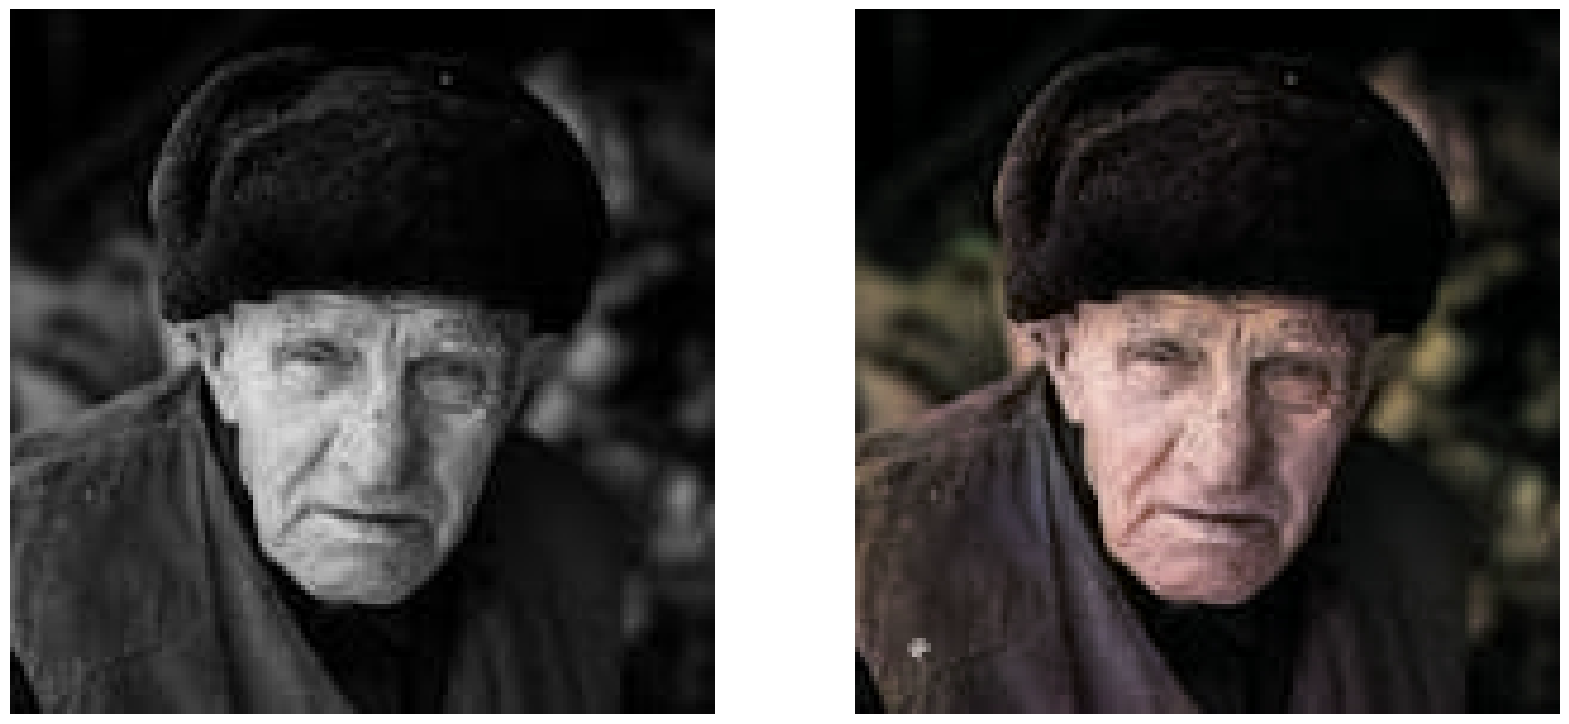

In [3]:
#NOTE:  Max is 45 with 11GB video cards. 35 is a good default
from deoldify.visualize import show_image_in_notebook


render_factor=30
#NOTE:  Make source_url None to just read from file at ./video/source/[file_name] directly without modification
source_url=None
source_path = 'test_images/old_dude.jpg'
result_path = None

if source_url is not None:
    result_path = colorizer.plot_transformed_image_from_url(url=source_url, path=source_path, render_factor=render_factor, compare=True)
else:
    result_path = colorizer.plot_transformed_image(path=source_path, render_factor=render_factor, compare=True)

show_image_in_notebook(result_path)

## See how well render_factor values perform on the image here

In [ ]:
# for i in range(10,46):
#     colorizer.plot_transformed_image(source_path, render_factor=i, display_render_factor=True, figsize=(10,10))